In [1]:
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os

RESULTS_PATH = 'results/weather/'

# Get all of the result files for the notebooks
results = []
for root, dirs, files in os.walk(RESULTS_PATH):
    for file in files:
        if file.endswith('.csv'):  # Must be a CSV
            results.append(file)

In [3]:
# Bar chart for a single notebook
def plot_bar(notebook):
    df = pd.read_csv(RESULTS_PATH + notebook + '.csv')

    df = df[df['model'] != 'SGD']
    # df = df[df['model'] != 'RNNMultiple']
    # df = df[df['model'] != 'RNNAll']

    df.plot(x='model', y=['train', 'test'], kind='bar', title=notebook, figsize=(15, 10), legend=True, fontsize=12)
    plt.ylabel('MAE Loss (Mean Average Error)')
    plt.show()
    
    print(df)

In [4]:
# Line chart for models across a set of notebooks
def plot_line(notebooks, ignore=None):
    df_all = pd.DataFrame()

    for notebook in notebooks:
        df = pd.read_csv(RESULTS_PATH + notebook + '.csv')
        df = df[df['model'] != 'SGD']
        # df = df[df['model'] != 'RNNMultiple']
        # df = df[df['model'] != 'RNNAll']
        
        if ignore is not None:
            for ign in ignore:
                df = df[df['model'] != ign]
                
        models = list(df['model'].unique())

        append_object = {'notebook': notebook}
        for model in models:
            append_object[model] = df[df['model'] == model]['test'].values[0]
        df_all = df_all.append(append_object, ignore_index=True)

    df_all.plot(x='notebook', figsize=(15, 10), legend=True, fontsize=12)
    plt.show()

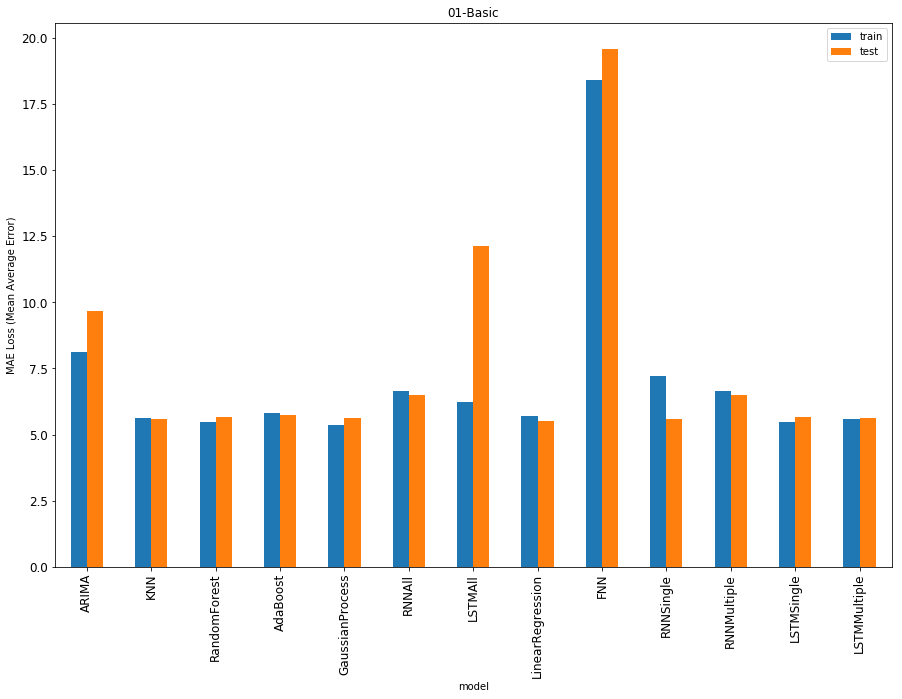

               model       test      train
0              ARIMA   9.669731   8.124119
1                KNN   5.578630   5.642694
3       RandomForest   5.675061   5.489711
4           AdaBoost   5.754440   5.826259
5    GaussianProcess   5.612069   5.356657
6             RNNAll   6.498351   6.658500
7            LSTMAll  12.136821   6.224091
8   LinearRegression   5.523648   5.693423
9                FNN  19.590798  18.422201
10         RNNSingle   5.575640   7.211260
11       RNNMultiple   6.505645   6.632561
12        LSTMSingle   5.652903   5.470305
13      LSTMMultiple   5.628426   5.583113


In [5]:
plot_bar('01-Basic')

# Chunk Data

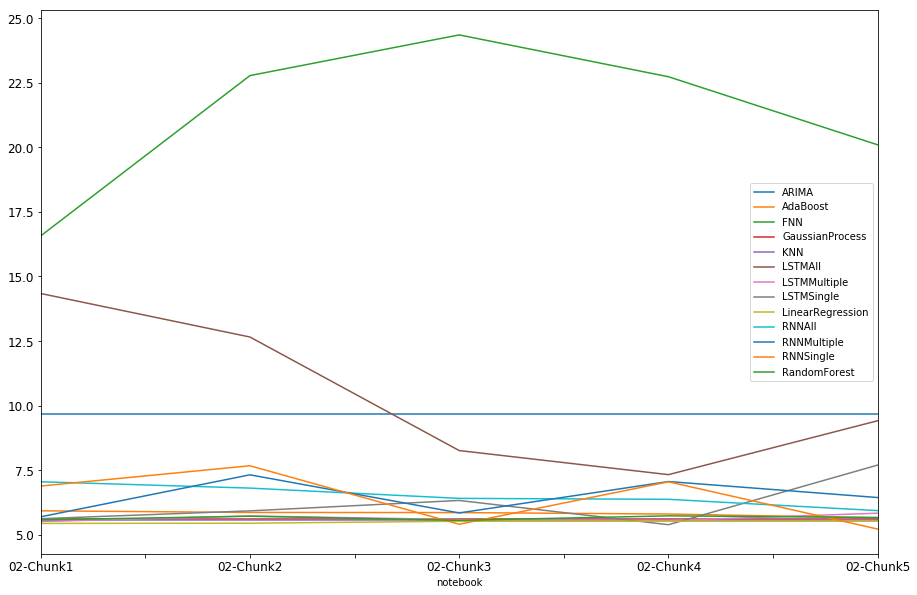

In [6]:
plot_line(['02-Chunk1', '02-Chunk2', '02-Chunk3', '02-Chunk4', '02-Chunk5'])

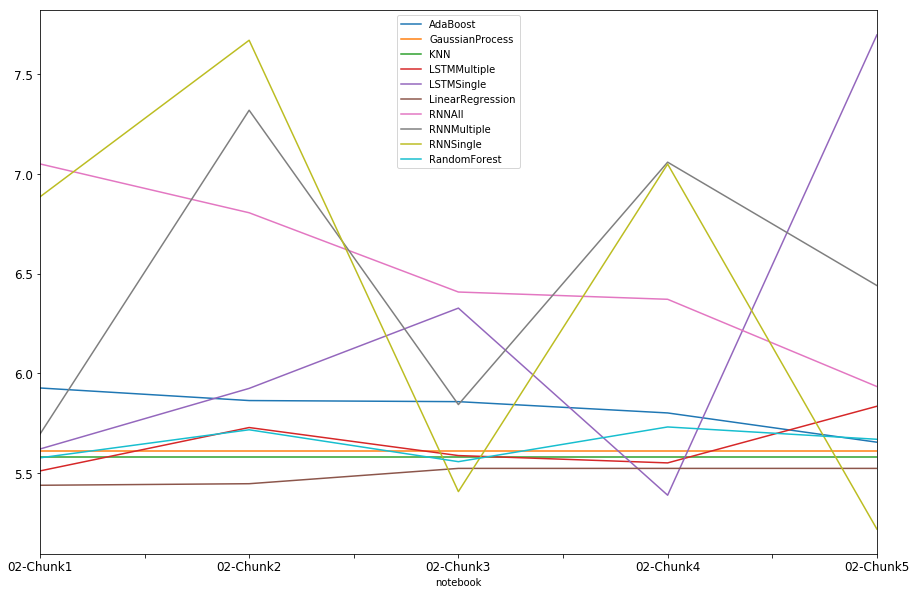

In [9]:
plot_line(['02-Chunk1', '02-Chunk2', '02-Chunk3', '02-Chunk4', '02-Chunk5'], ignore=['FNN', 'LSTMAll', 'ARIMA'])

In [ ]:
plot_bar('02-Chunk1')

In [ ]:
plot_bar('02-Chunk2')

In [ ]:
plot_bar('02-Chunk3')

In [ ]:
plot_bar('02-Chunk4')

In [ ]:
plot_bar('02-Chunk5')

# Features

### <YYYY, MM, DD>

In [ ]:
plot_line(['03-FeaturesDate', '03-FeaturesDate_n', '03-FeaturesDate_p', '03-FeaturesDate_pn'])

Going to ignore the red model (GaussianProcess) due to it causing the scale for other models to be barely visible.

In [ ]:
plot_line(['03-FeaturesDate', '03-FeaturesDate_n', '03-FeaturesDate_p', '03-FeaturesDate_pn'], ignore=['GaussianProcess'])

In [ ]:
plot_bar('03-FeaturesDate')

In [ ]:
plot_bar('03-FeaturesDate_n')

In [ ]:
plot_bar('03-FeaturesDate_p')

In [ ]:
plot_bar('03-FeaturesDate_pn')

### <actual_min_temp, actual_max_temp, actual_precipitation>

In [ ]:
plot_line(['03-FeaturesOther', '03-FeaturesOther_n', '03-FeaturesOther_p', '03-FeaturesOther_pn'])

Going to ignore a bunch of models from the top to be able to see the bottom ones that are on a smaller scale

In [ ]:
plot_line(['03-FeaturesOther', '03-FeaturesOther_n', '03-FeaturesOther_p', '03-FeaturesOther_pn'], ignore=['GaussianProcess', 'RNNSingle', 'FNN'])

In [ ]:
plot_bar('03-FeaturesOther')

In [ ]:
plot_bar('03-FeaturesOther_n')

In [ ]:
plot_bar('03-FeaturesOther_p')

In [ ]:
plot_bar('03-FeaturesOther_pn')